# Assignment 2 : Bias in Data

### Step 1: Select and Perform Analysis
The goal is to identify potential sources of bias in a corpus of human-annotated data, and describe some implications of those biases.
The corpus used iscalled the Wikipedia Talk corpus, and it consists of three datasets. Each dataset contains thousands of online discussion posts made by Wikipedia editors who were discussing how to write and edit Wikipedia articles. Crowdworkers labelled these posts for three kinds of hostile speech: “toxicity”, “aggression”, and “personal attacks”. Many posts in each dataset were labelled by multiple crowdworkers for each type of hostile speech, to improve accuracy.

For the purpose of this explatory analysis, the datasets used are:

Toxicity - 160k labeled comments from English Wikipedia by approximately 10 annotators via Crowdflower on a spectrum of how toxic the comment is (perceived as likely to make people want to leave the discussion) to how healthy to conversation the contribution is.

Aggression - 100k labeled comments from English Wikipedia by approximately 10 annotators via Crowdflower on how aggressive the comment was perceived to be along with some demographic data for each crowd-worker.


# Required Packages

- numpy : (https://numpy.org/)
- pandas : (https://pandas.pydata.org/)
- matplotlib : (https://matplotlib.org/)
- requests : (https://requests.readthedocs.io/en/master/)

# Data Source

This data can be found on <a href="https://figshare.com/articles/dataset/Wikipedia_Talk_Corpus/4264973"> Figshare </a>.

Cite

Wulczyn, Ellery; Thain, Nithum; Dixon, Lucas (2017): Wikipedia Talk Corpus. figshare. Dataset. https://doi.org/10.6084/m9.figshare.4264973.v3 

# Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read the Data

In [2]:
#Read Toxicity Files
tox_demo = pd.read_csv('toxicity_worker_demographics.tsv', sep='\t')
tox_ann = pd.read_csv('toxicity_annotations.tsv', sep='\t')

#Read Aggression Files
agg_demo = pd.read_csv('aggression_worker_demographics.tsv', sep='\t')
agg_ann = pd.read_csv('aggression_annotations.tsv', sep='\t')

# Eyeball the data files

## Toxicity Worker Data

In [3]:
tox_demo.head()

,worker_id,gender,english_first_language,age_group,education
0,85,female,0,18-30,bachelors
1,1617,female,0,45-60,bachelors
2,1394,female,0,NaN,bachelors
3,311,male,0,30-45,bachelors
4,1980,male,0,45-60,masters


## Toxicity Annotation Data

In [4]:
tox_ann.head()

,rev_id,worker_id,toxicity,toxicity_score
0,2232.0,723,0,0.0
1,2232.0,4000,0,0.0
2,2232.0,3989,0,1.0
3,2232.0,3341,0,0.0
4,2232.0,1574,0,1.0


## Aggression Worker Data

In [5]:
agg_demo.head()

,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs


## Aggression Annotation Data

In [6]:
agg_ann.head()

,rev_id,worker_id,aggression,aggression_score
0,37675,1362,1.0,-1.0
1,37675,2408,0.0,1.0
2,37675,1493,0.0,0.0
3,37675,1439,0.0,0.0
4,37675,170,0.0,0.0


# Step 1 : Analysis of the Toxicity Worker Data

## Distribution of Gender for Toxicity Worker

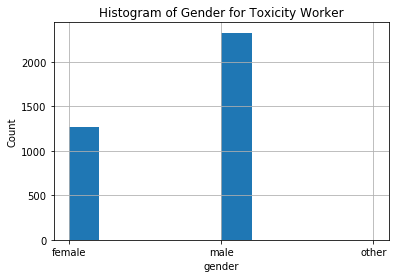

In [7]:
tox_demo.gender.hist()
plt.xlabel('gender')
plt.ylabel('Count')
plt.title(r'Histogram of Gender for Toxicity Worker')
plt.savefig('Histogram of Gender for Toxicity Worker', dpi=300,quality=95)
plt.show()

#### Thoughts: There are more males than female workers. That can be a source of bias.

## Distribution of English as First Langauge for Toxicity Worker

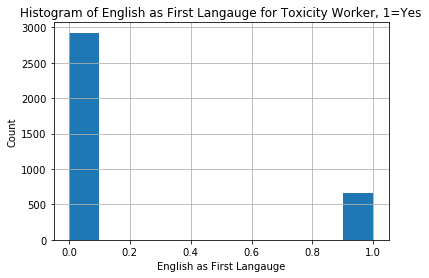

In [8]:
tox_demo['english_first_language'] = tox_demo['english_first_language'].astype(int)

tox_demo.english_first_language.astype(int).hist()
plt.xlabel('English as First Langauge')
plt.ylabel('Count')
plt.title(r'Histogram of English as First Langauge for Toxicity Worker, 1=Yes')
plt.savefig('Histogram of English as First Langauge for Toxicity Worker', dpi=300,quality=95)
plt.show()


#### Thoughts: There are more non English speaking workers. That can be a source of bias.

## Distribution of Age Group for Toxicity Worker

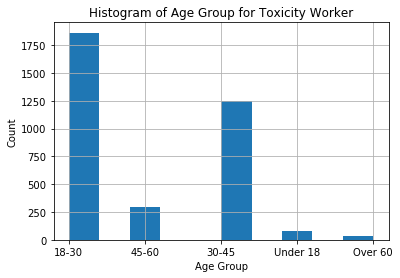

In [9]:
tox_demo.age_group.hist()
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title(r'Histogram of Age Group for Toxicity Worker')
plt.savefig('Histogram of Age Group for Toxicity Worker', dpi=300,quality=95)
plt.show()

### Thoughts: The Age distribution is not uniformly distributed. That can induce bias

## Distribution of Education for Toxicity Worker

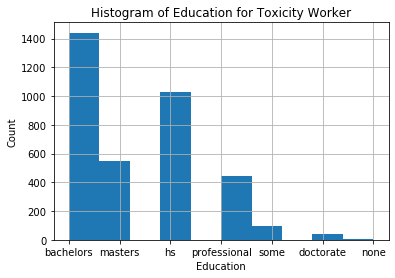

In [10]:
tox_demo.education.hist()
plt.xlabel('Education')
plt.ylabel('Count')
plt.title(r'Histogram of Education for Toxicity Worker')
plt.savefig('Histogram of Education for Toxicity Worker', dpi=300,quality=95)
plt.show()

### Thoughts: Most of the workers are educated so that is a good thing

## Distribution of Toxic Comments for Toxicity Worker

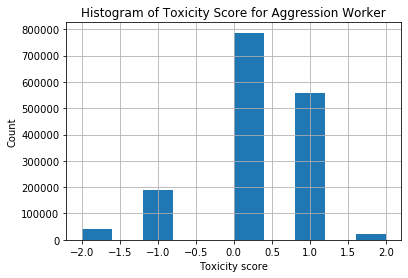

In [11]:
tox_ann.toxicity_score.hist()
plt.xlabel('Toxicity score')
plt.ylabel('Count')
plt.title(r'Histogram of Toxicity Score for Aggression Worker')
plt.savefig('Histogram of Toxicity Score for Aggression Worker', dpi=300,quality=95)
plt.show()

## Distribution of Toxic Score for Comments for Toxicity Worker

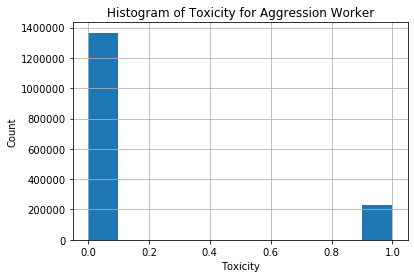

In [12]:
tox_ann.toxicity.hist()
plt.xlabel('Toxicity')
plt.ylabel('Count')
plt.title(r'Histogram of Toxicity for Aggression Worker')
plt.savefig('Histogram of Toxicity for Aggression Worker', dpi=300,quality=95)
plt.show()

# Analysis of the Aggression Annotation Data

## Distribution of Gender for Aggression Worker

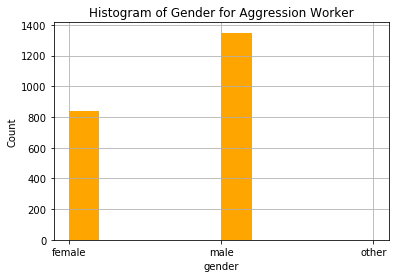

In [13]:
agg_demo.gender.hist(color='orange')
plt.xlabel('gender')
plt.ylabel('Count')
plt.title(r'Histogram of Gender for Aggression Worker')
plt.savefig('Histogram of Gender for Aggression Worker', dpi=300,quality=95)
plt.show()

#### Thoughts: There are more males than female workers. That can be a source of bias.

## Distribution of English as First Langauge for Aggression Worker

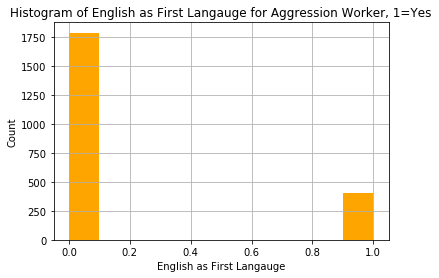

In [14]:
agg_demo['english_first_language'] = agg_demo['english_first_language'].astype(str)

agg_demo.english_first_language.astype(int).hist(color='orange')
plt.xlabel('English as First Langauge')
plt.ylabel('Count')
plt.title(r'Histogram of English as First Langauge for Aggression Worker, 1=Yes')
plt.savefig('Histogram of English as First Langauge for Aggression Worker', dpi=300,quality=95)
plt.show()


#### Thoughts: There are more non English speaking workers. That can be a source of bias.

## Distribution of Age Group for Aggression Worker

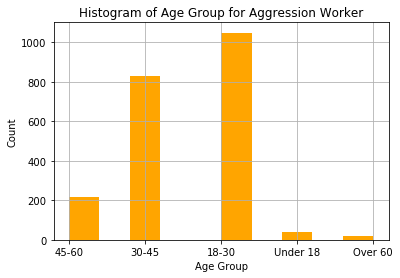

In [15]:
agg_demo.age_group.hist(color='orange')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title(r'Histogram of Age Group for Aggression Worker')
plt.savefig('Histogram of Age Group for Aggression Worker', dpi=300,quality=95)
plt.show()

### Thoughts: The Age distribution is not uniformly distributed. That can induce bias

## Distribution of Education for Aggression Worker

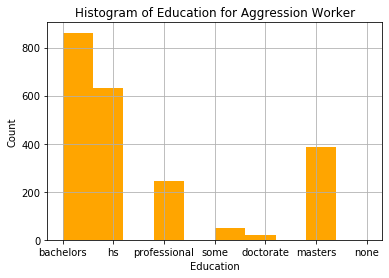

In [16]:
agg_demo.education.hist(color='orange')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title(r'Histogram of Education for Aggression Worker')
plt.savefig('Histogram of Education for Aggression Worker', dpi=300,quality=95)
plt.show()

### Thoughts: Most of the workers are educated so that is a good thing

## Distribution of Aggression Score for Comments

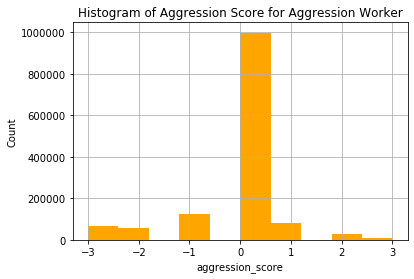

In [17]:
agg_ann.aggression_score.hist(color='orange')
plt.xlabel('aggression_score')
plt.ylabel('Count')
plt.title(r'Histogram of Aggression Score for Aggression Worker')
plt.savefig('Histogram of Aggression Score for Aggression Worker', dpi=300,quality=95)
plt.show()

## Distribution of Aggression Comments

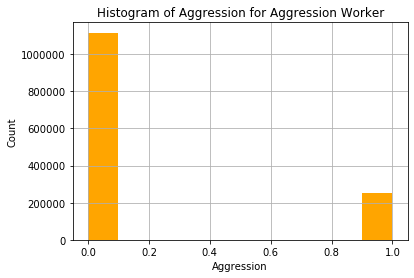

In [18]:
agg_ann.aggression.hist(color='orange')
plt.xlabel('Aggression')
plt.ylabel('Count')
plt.title(r'Histogram of Aggression for Aggression Worker')
plt.savefig('Histogram of Aggression for Aggression Worker', dpi=300,quality=95)
plt.show()

# Combining the data

In [19]:
tox_data = tox_ann.merge(tox_demo, how="inner", on="worker_id")
tox_data.head()

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education
0,2232.0,723,0,0.0,female,0,30-45,bachelors
1,37346.0,723,0,0.0,female,0,30-45,bachelors
2,227181.0,723,0,0.0,female,0,30-45,bachelors
3,2810755.0,723,0,0.0,female,0,30-45,bachelors
4,7270696.0,723,0,0.0,female,0,30-45,bachelors


In [20]:
agg_data = agg_ann.merge(agg_demo, how="inner", on="worker_id")
agg_data.head()

,rev_id,worker_id,aggression,aggression_score,gender,english_first_language,age_group,education
0,37675,1362,1.0,-1.0,male,0,18-30,masters
1,3202092,1362,0.0,0.0,male,0,18-30,masters
2,4745553,1362,0.0,0.0,male,0,18-30,masters
3,4855563,1362,0.0,0.0,male,0,18-30,masters
4,8350378,1362,0.0,0.0,male,0,18-30,masters


# How do different genders score toxicity?

In [21]:
tox_data.groupby(['gender', 'toxicity_score']).rev_id.agg('mean').reset_index()

,gender,toxicity_score,rev_id
0,female,-2.0,2.978042e+08
1,female,-1.0,2.962862e+08
2,female,0.0,3.026759e+08
3,female,1.0,3.001354e+08
4,female,2.0,2.975813e+08
5,male,-2.0,2.977106e+08
6,male,-1.0,2.956775e+08
7,male,0.0,3.030526e+08
8,male,1.0,2.990676e+08
9,male,2.0,2.946672e+08


In [22]:
tox_data.groupby(['gender', 'toxicity']).rev_id.agg('mean').reset_index()

,gender,toxicity,rev_id
0,female,0,3.015706e+08
1,female,1,2.965836e+08
2,male,0,3.012327e+08
3,male,1,2.960348e+08
4,other,0,2.833571e+08
5,other,1,3.005601e+08


# Question: Do the workers belonging to different genders show similar rating behavior?

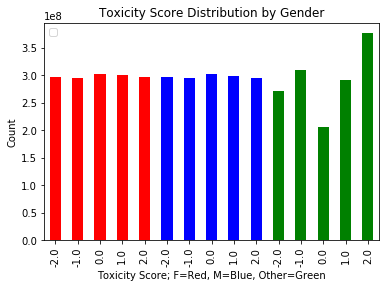

In [23]:
temp_df = tox_data.groupby(['gender', 'toxicity_score']).rev_id.agg('mean').reset_index()

colors = {'female': 'r', 'male': 'b', 'other': 'g'}
label=["female", "male", 'other']

temp_df.plot(y = 'rev_id', x = 'toxicity_score', kind='bar',color=temp_df['gender'].apply(lambda x: colors[x]), title='Toxicity Score Distribution by Gender', xlabel="Toxicity Score; F=Red, M=Blue, Other=Green", ylabel="Count", label='_nolegend_')

plt.savefig('Toxicity Score Distribution by Gende', dpi=300,quality=95)

plt.show()

# CONCLUSION

Females and Males score toxicity similarly on an average. While other genders show deviation and that can be a source of bias.

# IMPLICATION
One potential issue that can arise from this skew is the underrepresentation of females and other gender identities. The more alarming issue is how non-binary genders are not at all included in the process. 


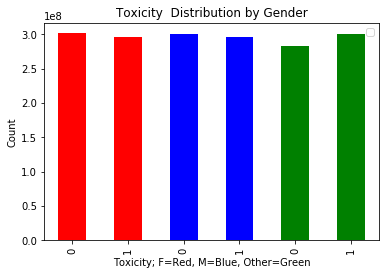

In [24]:
temp_df = tox_data.groupby(['gender', 'toxicity']).rev_id.agg('mean').reset_index()

colors = {'female': 'r', 'male': 'b', 'other': 'g'}
temp_df.plot(y = 'rev_id', x = 'toxicity', kind='bar',color=[colors[i] for i in temp_df['gender']], title='Toxicity  Distribution by Gender', xlabel="Toxicity; F=Red, M=Blue, Other=Green", ylabel="Count", label='_nolegend_')

plt.savefig('Toxicity  Distribution by Gender', dpi=300,quality=95)

plt.show()

# CONCLUSION

Females and Males and others score toxicity similarly on an average. This reduces bias

# IMPLICATION
All genders on an average rate the toxicity uniformly so that reduces bias


# How do different genders score aggression?

In [25]:
agg_data.groupby(['gender', 'aggression_score']).rev_id.agg('mean').reset_index()

,gender,aggression_score,rev_id
0,female,-3.0,2.982900e+08
1,female,-2.0,2.991360e+08
2,female,-1.0,2.969300e+08
3,female,0.0,3.011675e+08
4,female,1.0,2.960247e+08
5,female,2.0,2.908134e+08
6,female,3.0,3.067747e+08
7,male,-3.0,2.965712e+08
8,male,-2.0,2.993303e+08
9,male,-1.0,2.977609e+08


In [26]:
agg_data.groupby(['gender', 'aggression']).rev_id.agg('mean').reset_index()

,gender,aggression,rev_id
0,female,0.0,3.006964e+08
1,female,1.0,2.977498e+08
2,male,0.0,2.999047e+08
3,male,1.0,2.978831e+08
4,other,0.0,3.440298e+08
5,other,1.0,3.152128e+08


# Question: Do the workers belonging to different genders show similar rating behavior?

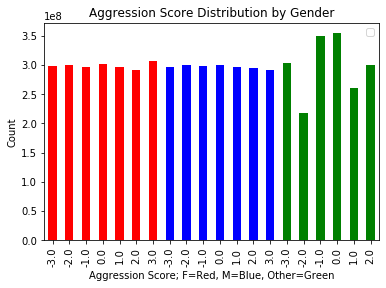

In [27]:
temp_df = agg_data.groupby(['gender', 'aggression_score']).rev_id.agg('mean').reset_index()

colors = {'female': 'r', 'male': 'b', 'other': 'g'}
label=["female", "male", 'other']

temp_df.plot(y = 'rev_id', x = 'aggression_score', kind='bar',color=temp_df['gender'].apply(lambda x: colors[x]), title='Aggression Score Distribution by Gender', xlabel="Aggression Score; F=Red, M=Blue, Other=Green", ylabel="Count", label='_nolegend_')

plt.savefig('Aggression Score Distribution by Gender', dpi=300,quality=95)

plt.show()

# CONCLUSION

Females and Males score aggression similarly on an average. While other genders show deviation and that can be a source of bias.

# IMPLICATION
One potential issue that can arise from this skew is the underrepresentation of females and other gender identities. The more alarming issue is how non-binary genders are not at all included in the process. 


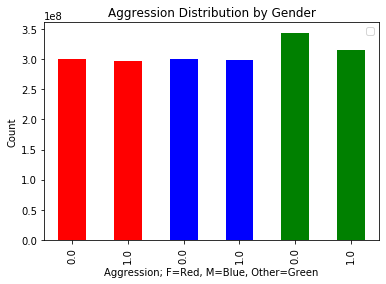

In [28]:
temp_df = agg_data.groupby(['gender', 'aggression']).rev_id.agg('mean').reset_index()

colors = {'female': 'r', 'male': 'b', 'other': 'g'}
temp_df.plot(y = 'rev_id', x = 'aggression', kind='bar',color=[colors[i] for i in temp_df['gender']], title='Aggression Distribution by Gender', xlabel="Aggression; F=Red, M=Blue, Other=Green", ylabel="Count", label='_nolegend_')

plt.savefig('Aggression Distribution by Gender', dpi=300,quality=95)

plt.show()

# CONCLUSION

Females and Males score aggression similarly on an average

# Step 2: Discuss further implications

#### Q1. Which, if any, of these demo applications would you expect the Perspective API—or any model trained on the Wikipedia Talk corpus—to perform well in? Why?
Since the model is trained in English, it would perform well in identifying toxic and aggressive comments on blogs and website that use English as their language.

#### Q2. Which, if any, of these demo applications would you expect the Perspective API to perform poorly in? Why?
When the language is not English, we expect the model to perform poorly. The model might not be able to detect sarcasm either.

#### Q3. What are some kinds of hostile speech that would be difficult to accurately detect using the approach used to train the Perspective API models?
Speeches/comments that are posted in a non-English language would be hard for Perspective API to accurately detect. This could be because the current NLP model works well only with English language. The model might not be able to detect sarcasm either.


##### Q4. What are some potential unintended, negative consequences of using the Perspective API for any of these purposes? In your opinion, are these consequences likely or serious enough that you would recommend that the Perspective API not be used in these applications? Why or why not?
If one of type of people are excluded from being moderators, for example people who don't identify themselves from the binary gender, then views could be repressed. Content that is harmful derogatory towards them might not get flagged as toxic and the model might not work well. 